# Data Clustering and Predictive Modeling Project

## Objective
This project aims to:
1. Cluster data into 3 or 4 groups based on covariates and analyze their relationships with the outcome variable \( y \).
2. Develop a predictive function \( \hat{y} \) to approximate \( y \) more effectively, as \( y \) is poorly described.

---

## Dataset Overview
- **Outcome Variable (y):** The target variable; \( y = 0 \) rows are filtered out.
- **Covariates:**
  - \( X1, X2, X3 \): Measure similar aspects.
  - \( Z1, Z2 \): Measure another aspect but are closely related.
  - \( A \): Represents a distinct attribute.
  - \( B \): Represents another distinct attribute.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


In [5]:
data.shape

(40, 9)

In [6]:
data.isnull().sum()

ID    0
X1    0
X2    0
X3    0
Z1    0
Z2    1
A     0
B     0
Y     0
dtype: int64

In [7]:
data.describe()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
count,40.000000,40.000000,40.000000,40.000000,40.000000,39.000000,40.000000,4.000000e+01,40.000000
mean,1020.500000,13.580250,3.504500,5.039500,231.650000,66.205128,7493.700000,1.485545e+06,15.875000
std,11.690452,11.998647,4.392764,5.978699,311.428434,83.049186,8173.464533,2.609205e+06,15.857438
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1010.750000,2.025000,0.000000,1.000000,11.750000,4.000000,591.750000,0.000000e+00,3.000000
50%,1020.500000,11.900000,2.500000,2.000000,107.000000,39.000000,6394.500000,1.855995e+05,11.500000
75%,1030.250000,22.077500,4.000000,7.370000,289.000000,80.500000,11154.000000,1.290316e+06,26.000000
max,1040.000000,41.980000,20.770000,23.500000,1311.000000,316.000000,31506.000000,8.478033e+06,63.000000


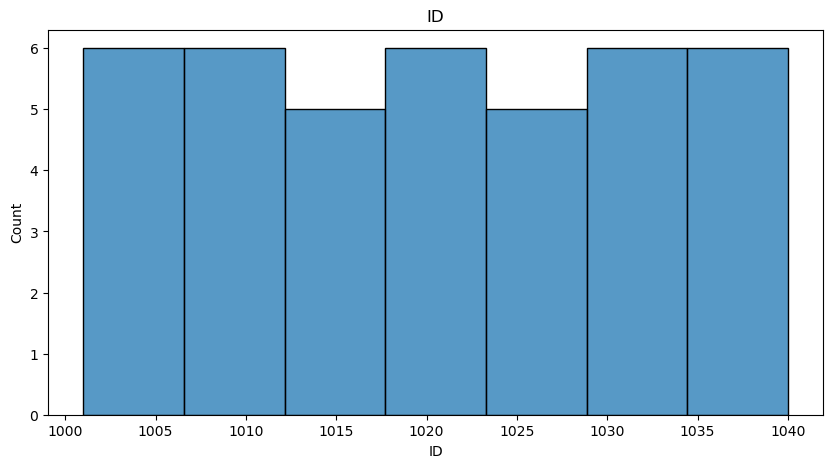

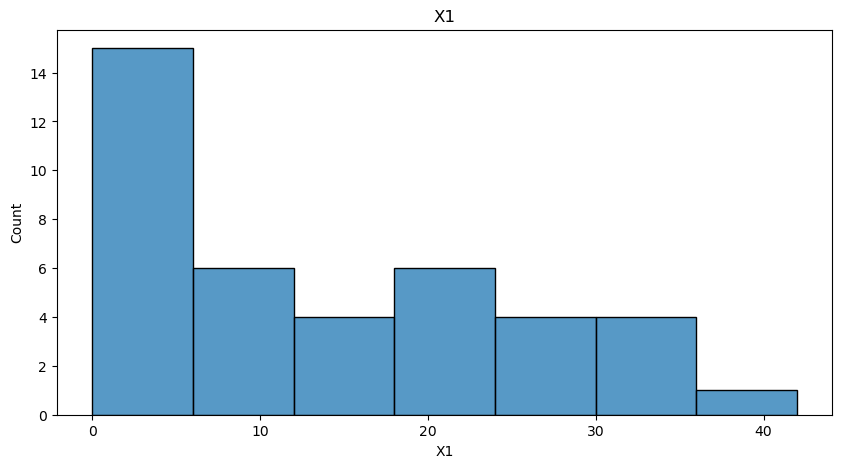

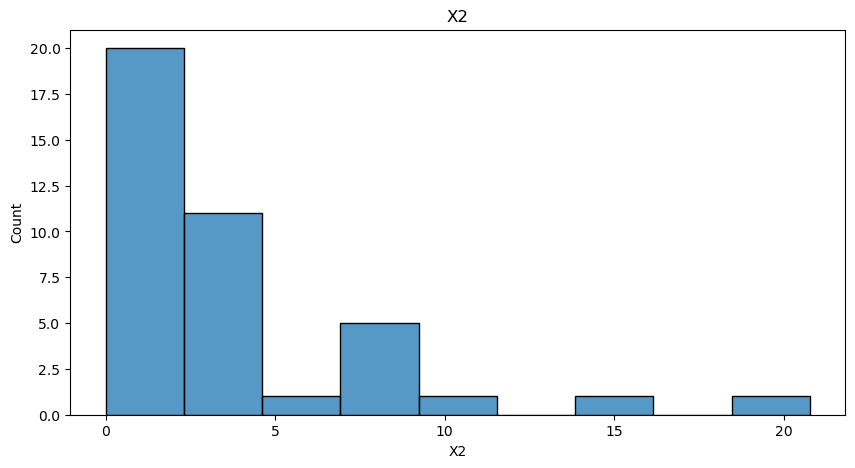

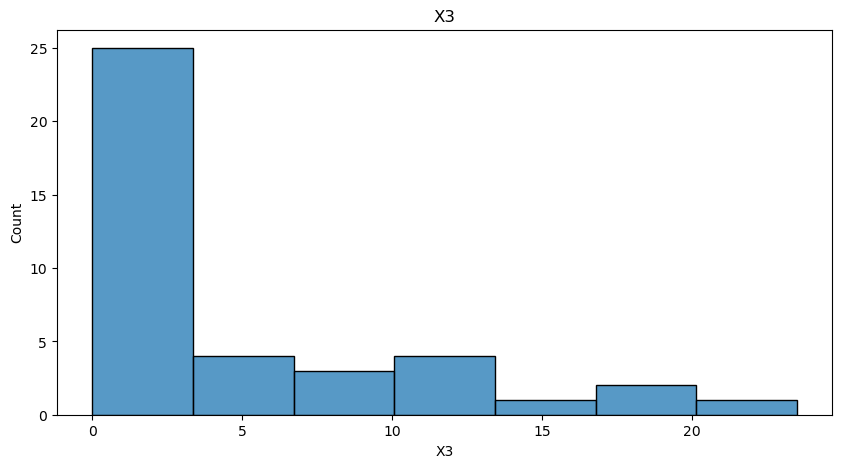

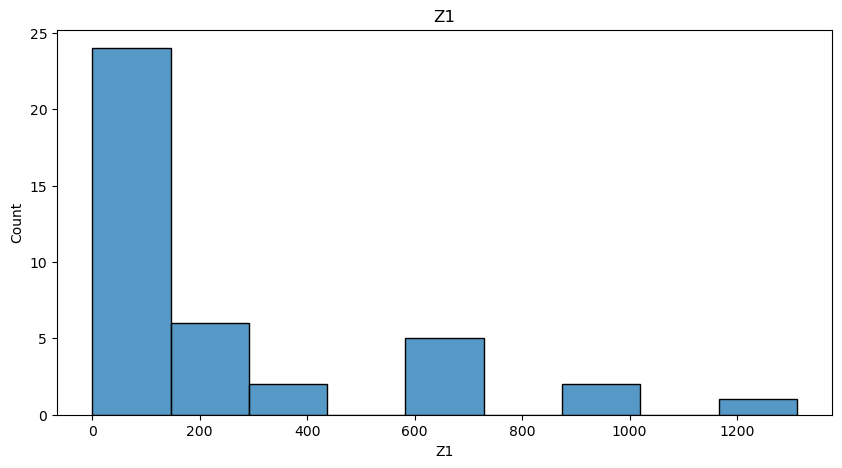

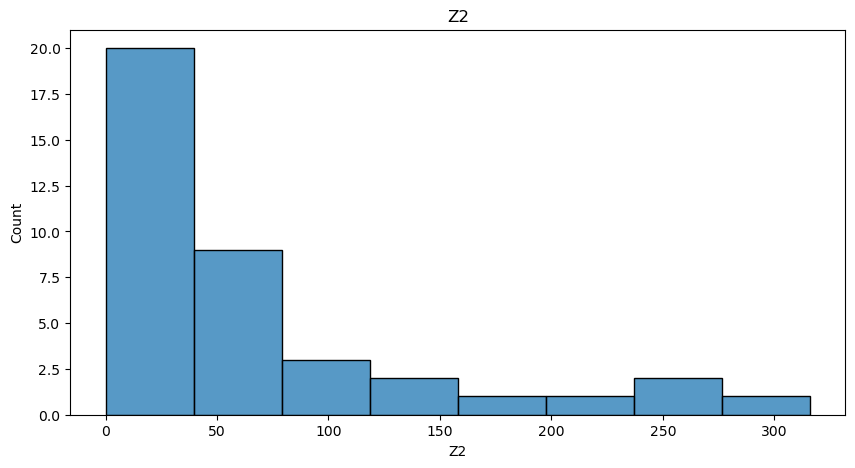

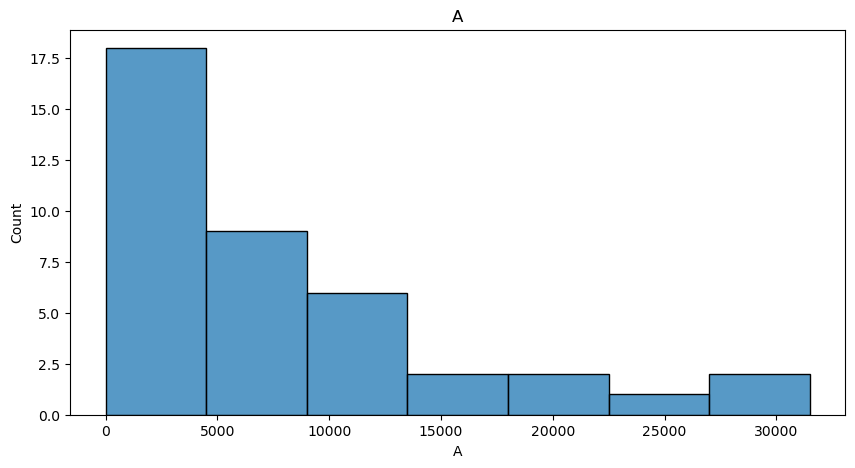

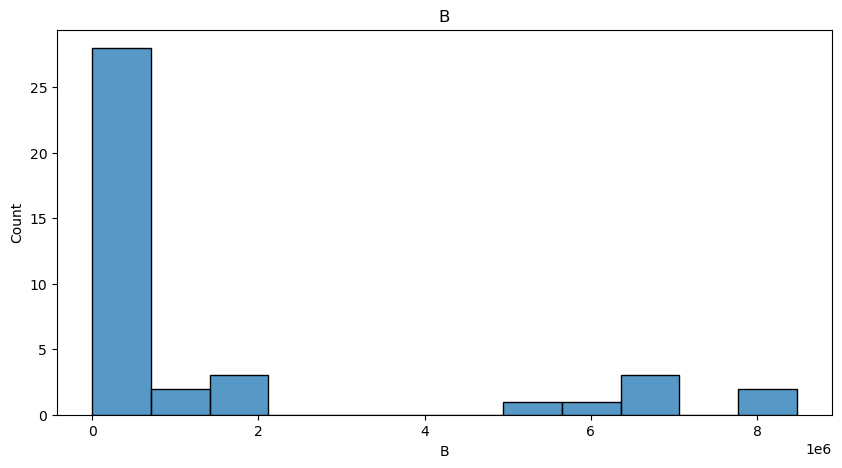

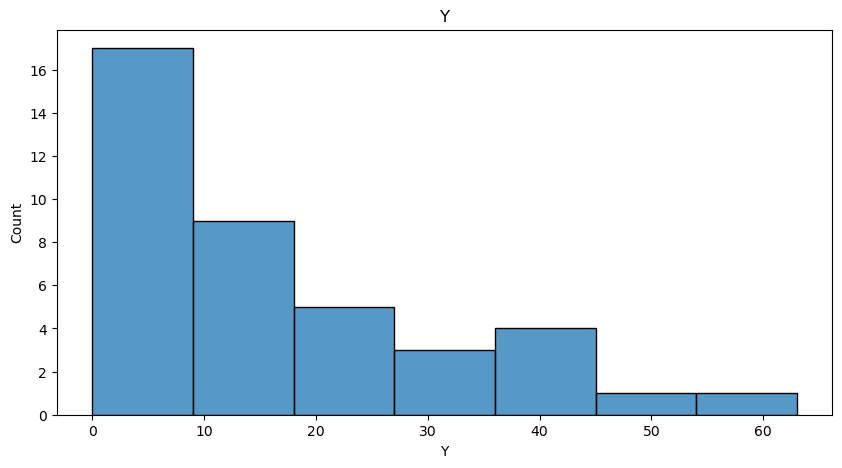

In [9]:
for i in data.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data[i])
    plt.title(i)
    plt.show()

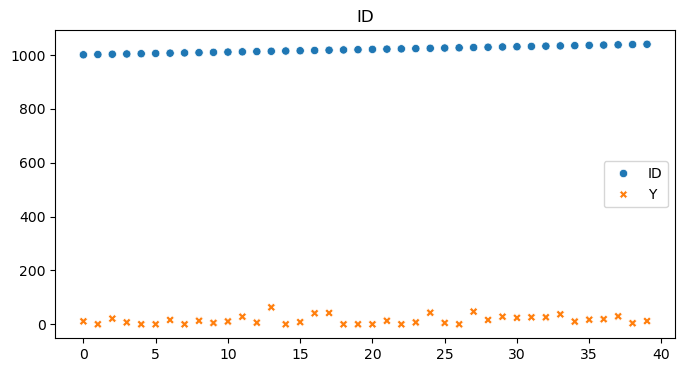

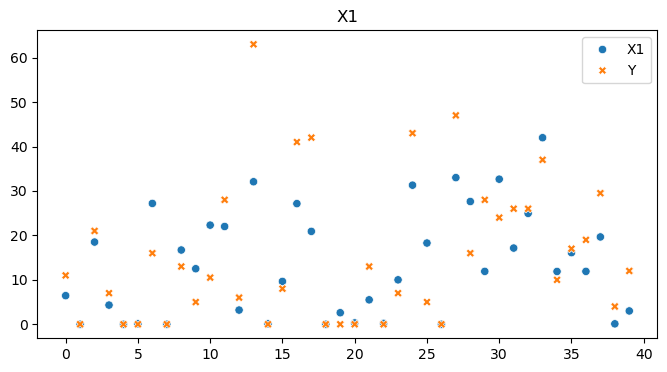

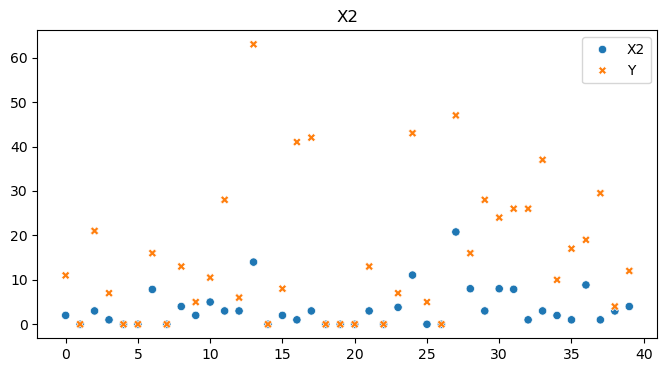

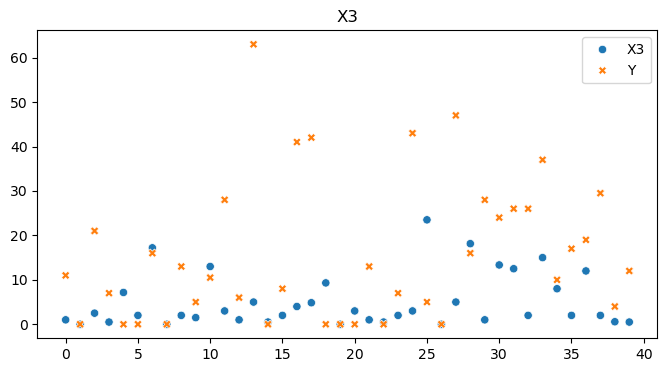

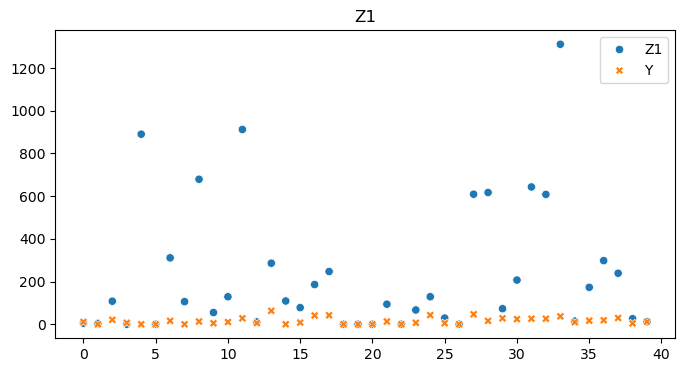

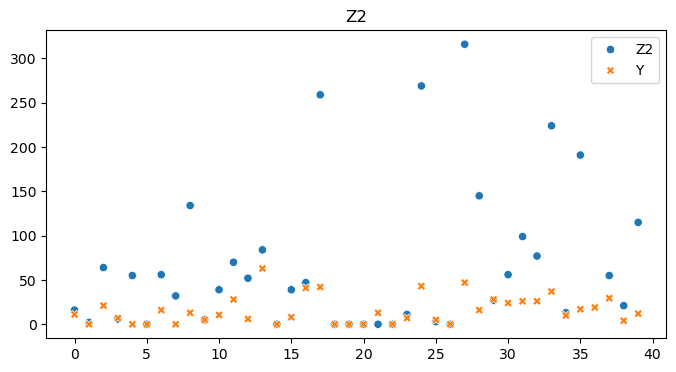

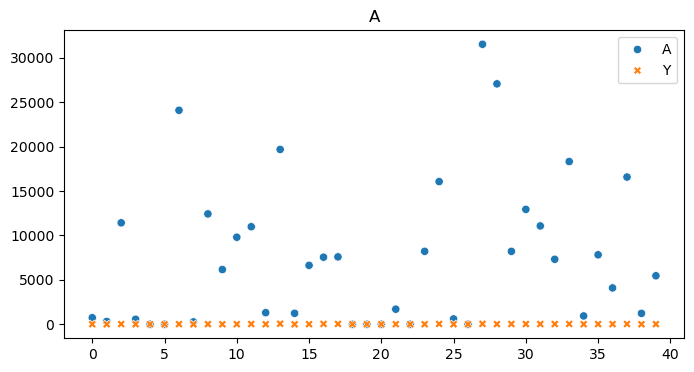

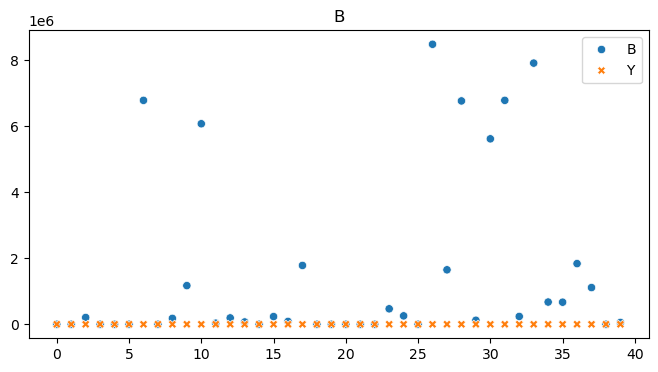

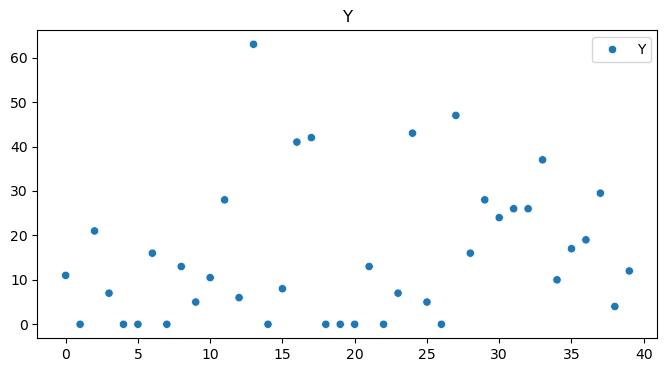

In [17]:
#scatter plot to check for relation between the variables and outcome variable
for i in data.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot([data[i],data['Y']])
    plt.title(i)
    plt.show()

In [30]:
data.describe()

,ID,X1,X2,X3,Z1,Z2,A,B,Y,bins
count,40.000000,40.000000,40.000000,40.000000,40.000000,39.000000,40.000000,4.000000e+01,40.000000,40.000000
mean,1020.500000,13.580250,3.504500,5.039500,231.650000,66.205128,7493.700000,1.485545e+06,15.875000,1.475000
std,11.690452,11.998647,4.392764,5.978699,311.428434,83.049186,8173.464533,2.609205e+06,15.857438,1.131994
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1010.750000,2.025000,0.000000,1.000000,11.750000,4.000000,591.750000,0.000000e+00,3.000000,0.750000
50%,1020.500000,11.900000,2.500000,2.000000,107.000000,39.000000,6394.500000,1.855995e+05,11.500000,1.000000
75%,1030.250000,22.077500,4.000000,7.370000,289.000000,80.500000,11154.000000,1.290316e+06,26.000000,2.250000
max,1040.000000,41.980000,20.770000,23.500000,1311.000000,316.000000,31506.000000,8.478033e+06,63.000000,3.000000


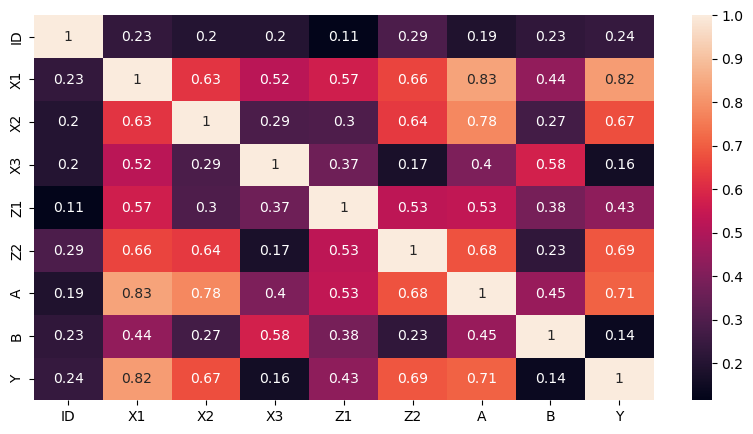

In [18]:
# correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

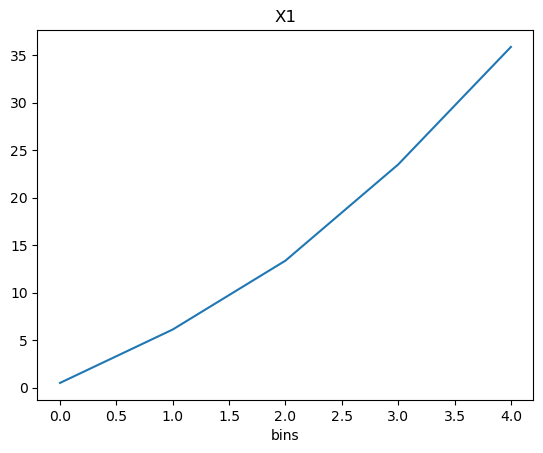

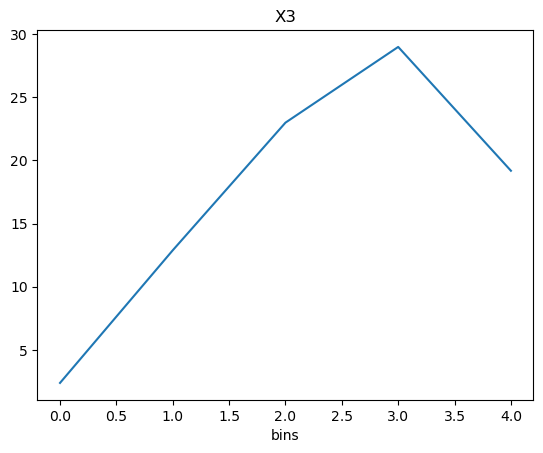

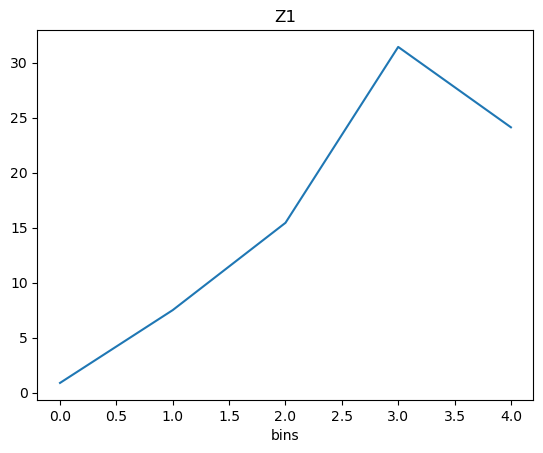

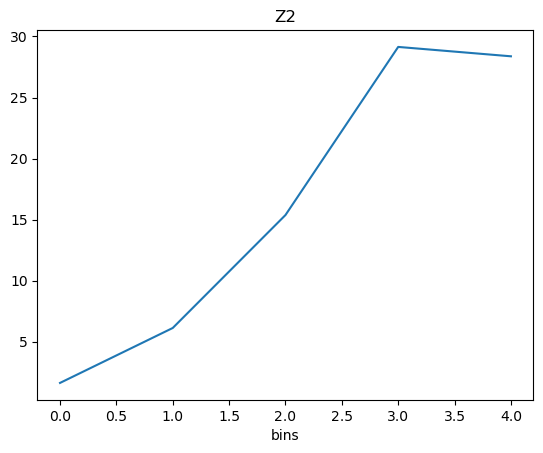

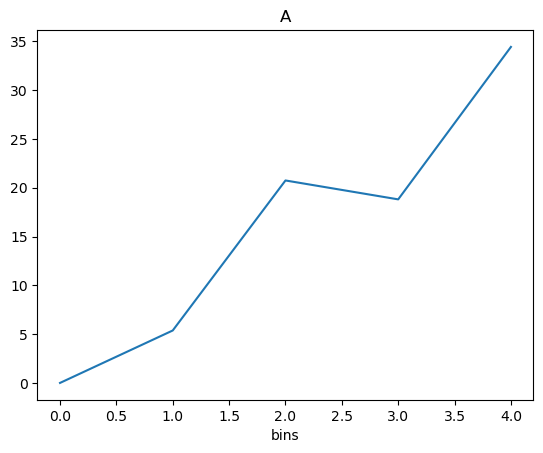

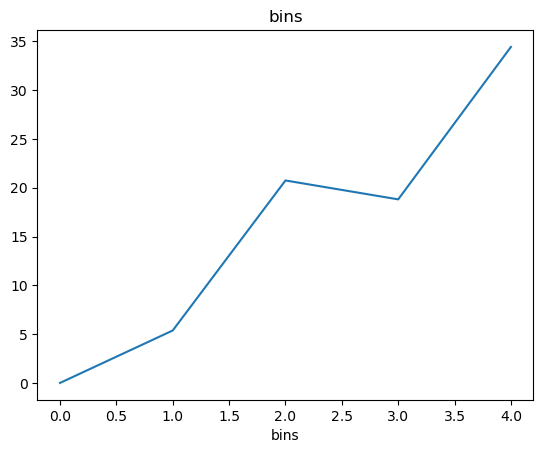

In [34]:
# Binning the variable into buckets and plotting the avergae outcome variable, bin edges must be unique
for i in data.columns:
    if i == 'ID':
        continue
    try:
        data['bins'] = pd.qcut(data[i],q=5,labels=False)
        data.groupby('bins')['Y'].mean().plot() 
        plt.title(i)
        plt.show()
    except:
        pass


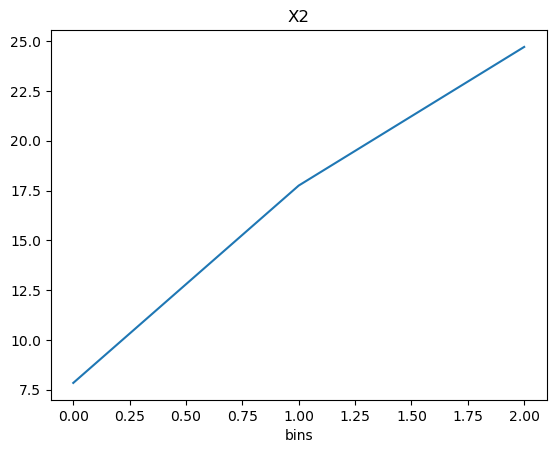

In [38]:
# plottign X2 and Y, X2 on X axis as binned bars an Y as avg on y axis
data['bins'] = pd.qcut(data['X2'],q=3,labels=False)
data.groupby('bins')['Y'].mean().plot()
plt.title('X2')
plt.show()


In [49]:
required_cols = ['X1','X2','X3','Z1','Z2','A','B','Y']
data = data[required_cols]

In [51]:
X = data.drop('Y',axis=1)
y = data['Y']


In [53]:
X.fillna(X.mean(),inplace=True)

In [56]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
